In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import SVG
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import svg_graph, svg_bigraph
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.manifold import TSNE
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [20]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Define advanced text preprocessing function
lemmatizer = WordNetLemmatizer()

def preprocess_advanced(text):
    # Tokenize and lemmatize
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmas)

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...


In [25]:
# Read datasets
test = pd.read_csv("data/test.csv")
# Apply advanced preprocessing
test['processed_text_advanced'] = test['text'].apply(preprocess_advanced)

# Vectorize text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=0.01)
tfidf_matrix = tfidf_vectorizer.fit_transform(test['processed_text_advanced'])

# Calculate cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)

Louvain

In [21]:
# # Use TF-IDF to vectorize texts
# tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# tfidf_matrix = tfidf_vectorizer.fit_transform(test['text'])

# # Calculate cosine similarity matrix
# similarity_matrix = cosine_similarity(tfidf_matrix)

In [26]:
adjacency = csr_matrix(similarity_matrix, dtype=int)
# Apply the Louvain method
louvain = Louvain()
labels = louvain.fit_predict(adjacency)

In [28]:
# Analyze clusters
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)

[   0    1    2 ... 1727 1728 1729] [139  47  29 ...   1   1   1]


In [35]:
# pca = PCA(n_components=2)
# position= pca.fit_transform(tfidf_matrix.toarray())
# image = svg_graph(adjacency, position, labels=labels, scale=2, node_size=4,edge_width=0.5)
# SVG(image)

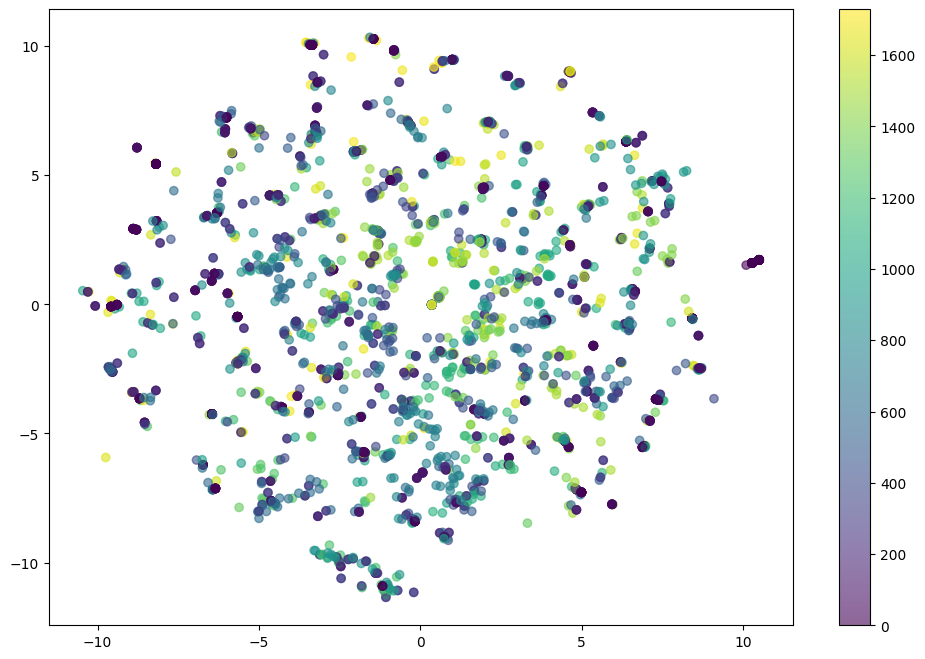

In [30]:
tsne_model = TSNE(n_components=2, perplexity=30, n_iter=300)
position_tsne = tsne_model.fit_transform(tfidf_matrix.toarray())

# plot the results for the filtered clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(position_tsne[:, 0], position_tsne[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.show()

In [31]:
# Calculate modularity
get_modularity(adjacency, labels)

0.7017271838116534

In [32]:
# aggregate graph (one node per cluster)
adjacency_aggregate = louvain.aggregate_

In [39]:
average = normalize(get_membership(labels).T)
position_aggregate = average.dot(position_tsne)
labels_unique, counts = np.unique(labels, return_counts=True)
aggregated_labels = range(position_aggregate.shape[0])

In [40]:
# image = svg_graph(adjacency_aggregate, position_aggregate, counts, labels=labels_unique,
#                   display_node_weight=True, node_weights=counts,scale=2)
# SVG(image)

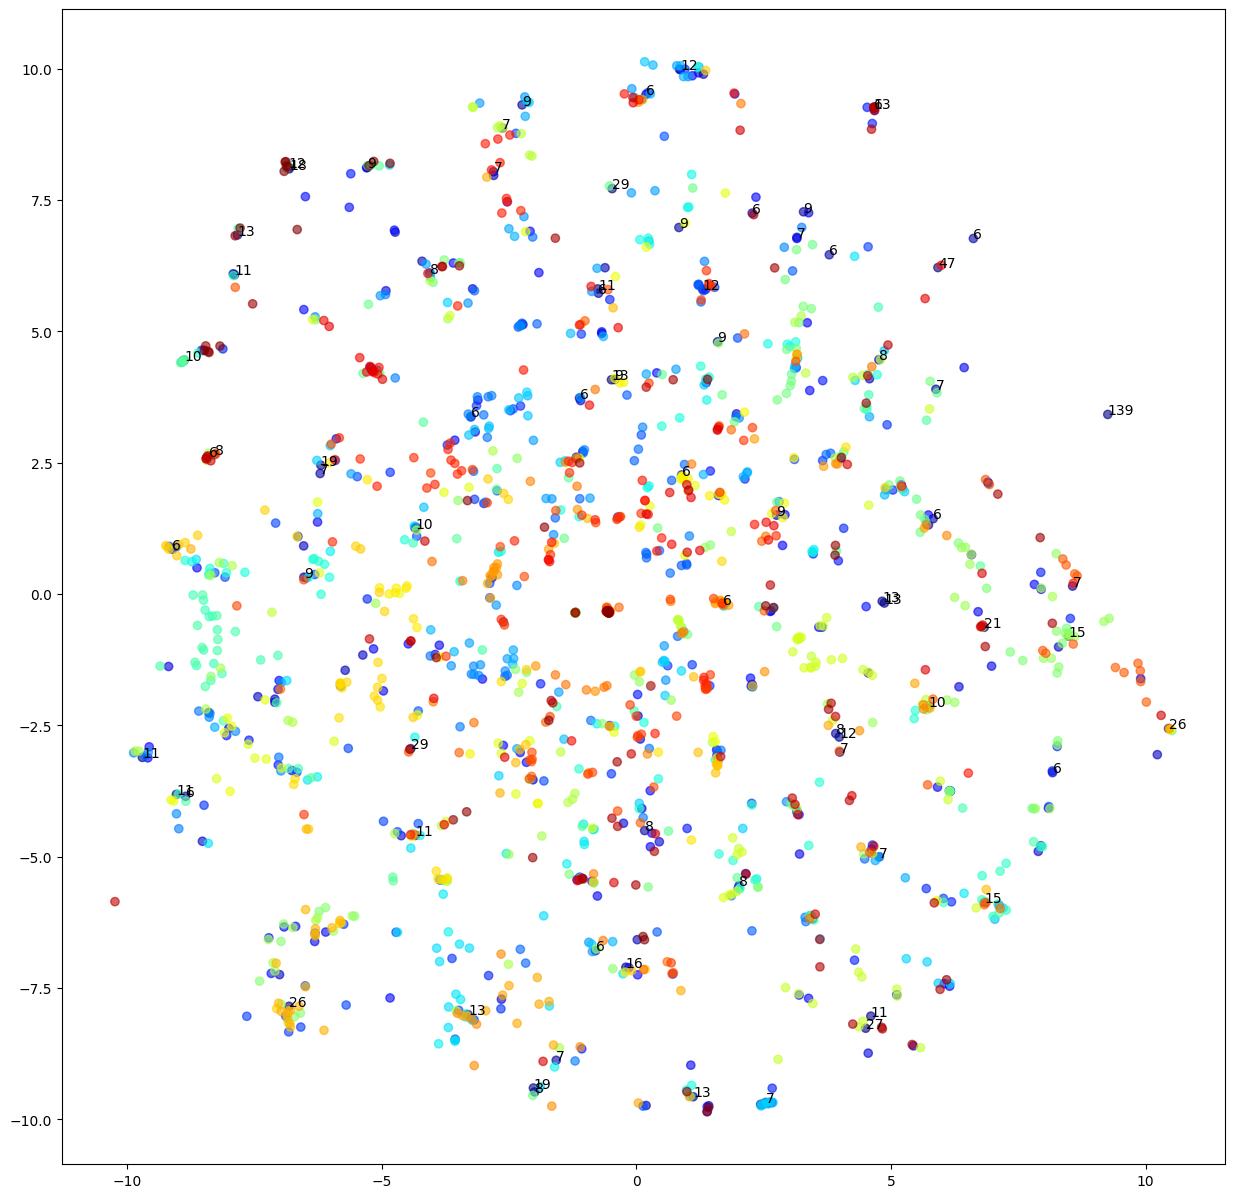

In [42]:

fig, ax = plt.subplots(figsize=(15, 15))

# Create a scatter plot for nodes. Use 'aggregated_labels' for coloring to match the aggregated clusters.
scatter = ax.scatter(position_aggregate[:, 0], position_aggregate[:, 1], 
                     c=aggregated_labels, cmap='jet', alpha=0.6)

# Annotating clusters with their sizes (counts)
for i, count in enumerate(counts):  
    if count > 5:  # Only annotate clusters with more than 5 nodes
        ax.annotate(count, (position_aggregate[i, 0], position_aggregate[i, 1]))

plt.show()